In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Reading dataframe

In [2]:
sales = pd.read_csv('/content/drive/MyDrive/Colab/Без названия/Sales_all.csv')
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Cleaning up the data

In [3]:
sales = sales.dropna()
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Converting columns to the correct type

In [5]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')
sales.dropna(subset=['Quantity Ordered'], inplace=True)
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'])
sales['Price Each'] = pd.to_numeric(sales['Price Each'])
sales[['Order ID', 'Quantity Ordered']] = sales[['Order ID', 'Quantity Ordered']].astype('int32')
for index, row in sales.iterrows():
    sales.at[index, 'Price Each'] = round(row['Price Each'], 2)

<ipython-input-5-c9dff7333d80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')
<ipython-input-5-c9dff7333d80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.dropna(subset=['Quantity Ordered'], inplace=True)
<ipython-input-5-c9dff7333d80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Rename column for ease of manipulation

In [6]:
sales = sales.rename(columns = {'Order ID':'order_id','Quantity Ordered':'quantity', 'Price Each':'price_unit', 'Order Date':'date', 'Purchase Address':'city'})

Convert to the correct date format and extract the time and month

In [7]:
sales['date'] = pd.to_datetime(sales['date'], format="%m/%d/%y %H:%M")
sales['month'] = sales['date'].dt.strftime('%B')
sales['time'] = sales['date'].dt.hour

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   order_id    185950 non-null  int32         
 1   Product     185950 non-null  object        
 2   quantity    185950 non-null  int32         
 3   price_unit  185950 non-null  float64       
 4   date        185950 non-null  datetime64[ns]
 5   city        185950 non-null  object        
 6   month       185950 non-null  object        
 7   time        185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(3)
memory usage: 15.4+ MB


Convert de address, and extract the city

In [9]:
sales['city'] = sales['city'].str.split(',').str[1].str.strip()

In [10]:
sales

,order_id,Product,quantity,price_unit,date,city,month,time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas,April,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston,April,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles,April,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles,April,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles,April,9
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,Los Angeles,September,20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,San Francisco,September,16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,San Francisco,September,7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,San Francisco,September,17


Reset the index

In [11]:
sales = sales.reset_index(drop=True)

Revenue calculation

In [12]:
sales['revenue'] = sales['quantity'] * sales['price_unit']

In [13]:
sales.describe()

,order_id,quantity,price_unit,time,revenue
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,14.413305,185.490917
std,51512.737110,0.442793,332.731330,5.423416,332.919771
min,141234.000000,1.000000,2.990000,0.000000,2.990000
25%,185831.250000,1.000000,11.950000,11.000000,11.950000
50%,230367.500000,1.000000,14.950000,15.000000,14.950000
75%,275035.750000,1.000000,150.000000,19.000000,150.000000
max,319670.000000,9.000000,1700.000000,23.000000,3400.000000



The table provides insights into the range of product costs, with prices ranging from 2.99 to 1700 dollars. Additionally, it reveals that the maximum number of products in a single order is 9. On average, customers purchase 1 item per order, with the average price per unit being 14.95 dollars. The highest revenue generated from a single order amounts to 3400 dollars.

In [14]:
corr = sales.corr()

<ipython-input-14-e73a5f1cc519>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


Text(0.5, 1.0, 'Correlation Matrix')

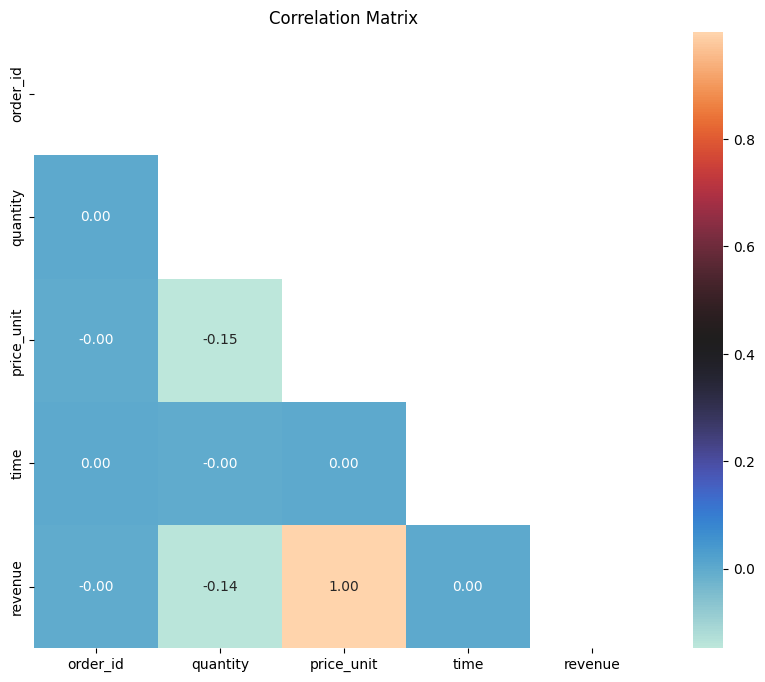

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='icefire', fmt=".2f", mask=mask, ax=ax)
ax.set_title('Correlation Matrix')


As the unit price of a product decreases, its quantity sold tends to increase.
Orders with higher revenue tend to have fewer items.
There is a positive correlation between unit price and revenue.

# Analysis

**Sales by city**

In [23]:
fig = px.pie(city_sales, values='percent_sales', names='city', color_discrete_sequence=px.colors.sequential.Plasma,
             title='Sales by city')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

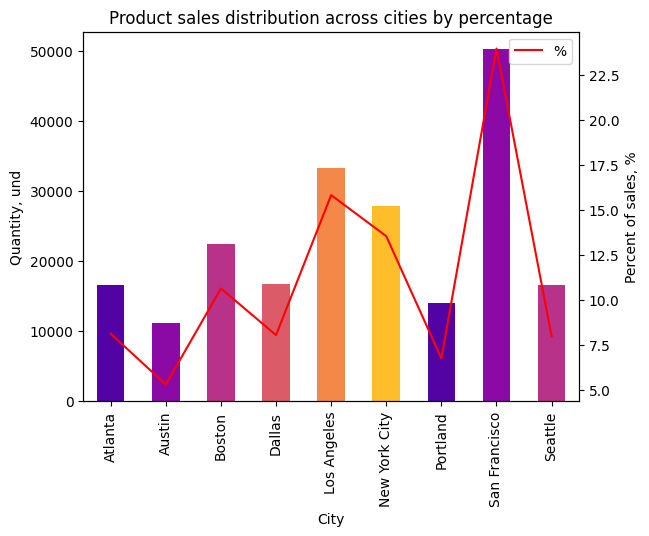

In [27]:
city_quant = sales.groupby('city')['quantity'].sum().reset_index()
fig, ax = plt.subplots()
palette = sns.color_palette('plasma')
city_quant['quantity'].plot(kind='bar', x='city', y='quantity', ax=ax, color=palette)
ax1 = ax.twinx()
ax1.plot(city_sales.city, city_sales.percent_sales, color='r')

ax1.set_ylabel('Percent of sales, %')
ax.set_ylabel('Quantity, und')
ax.set_title('Product sales distribution across cities by percentage')
ax.set_xticks(range(len(city_quant.city)))
ax.set_xticklabels(city_quant.city, rotation=90)
ax.set_xlabel('City')
plt.legend('% sales')
plt.show()

This suggests that there is a strong positive correlation between the quantity of products sold and the revenue generated across different cities.
The top-performing cities for sales are San Francisco and Los Angeles, while Austin and Portland show the lowest sales figures. This trend is likely influenced by Silicon Valley's prominence, renowned for its concentration of technology firms, startups, and groundbreaking innovations. Consequently, the demand for tech products and electronics may experience a considerable surge in this area.

To boost sales in Austin and Portland, strategies like geo-targeted advertising or localized store promotions can be effective. Alternatively, a coordinated marketing campaign featuring discounts and promotions exclusively targeted at users in these cities could yield positive results.

**Monthly sales**

In [ ]:
sales.head()

,order_id,Product,quantity,price_unit,date,city,month,time,revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,Dallas,April,8,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,Boston,April,22,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,Los Angeles,April,14,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,Los Angeles,April,14,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,Los Angeles,April,9,11.99


Arrangement of months

In [28]:
sales['month'] = pd.Categorical(sales['date'].dt.strftime('%B'),
                                categories=['January', 'February', 'March', 'April', 'May', 'June',
                                            'July', 'August', 'September', 'October', 'November', 'December'],
                                ordered=True)

In [29]:
month_sales = sales.groupby('month').agg({'revenue': 'sum', 'quantity': 'sum'}).reset_index()
month_sales

,month,revenue,quantity
0,January,1822256.73,10903
1,February,2202022.42,13449
2,March,2807100.38,17005
3,April,3390670.24,20558
4,May,3152606.75,18667
5,June,2577802.26,15253
6,July,2647775.76,16072
7,August,2244467.88,13448
8,September,2097560.13,13109
9,October,3736726.88,22703


Analysis of sales by month

<ipython-input-72-0d7a828dd831>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



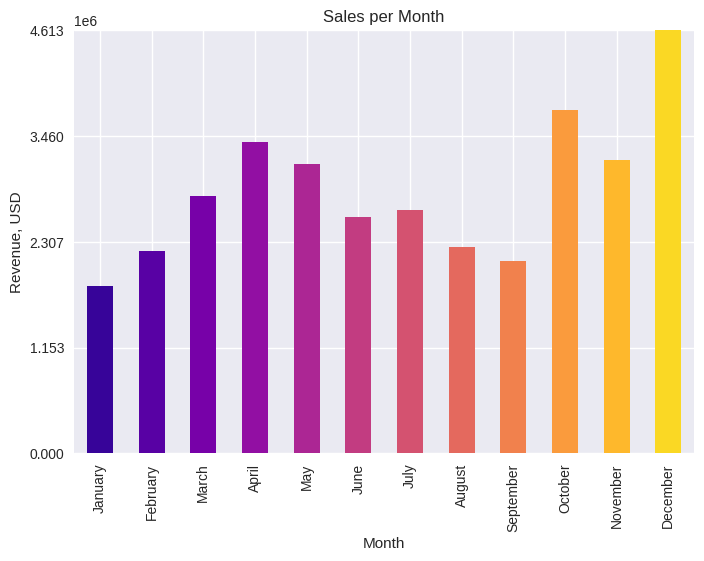

In [72]:
fig, ax = plt.subplots()
plt.style.use("seaborn")
palette = sns.color_palette("plasma", 12)
month_sales.plot(kind='bar', x='month', y='revenue',ax=ax, color=palette, legend=False)

ax.set_ylabel('Revenue, USD')
ax.set_xlabel('Month')
ax.set_title('Sales per Month')
plt.xticks(rotation=90)

max_revenue = month_sales['revenue'].max()
ax.set_ylim(0, max_revenue)
num_ticks = 5
step = max_revenue / (num_ticks - 1)
yticks = [i * step for i in range(num_ticks)]
ax.set_yticks(yticks)
plt.show()

Sales peak in December for all, which is to be expected given the holiday season. There are also notable sales spikes in April and October. This could be attributed to Apple product releases, as these months coincide with the launch of new products following announcements in March and September. <br>
Sales hit their lowest point in January, likely because consumers allocate their spending towards holiday gifts in December. Similarly, there's a noticeable dip in sales during the summer months, possibly due to the vacation season. Implementing promotions or discounts throughout the summer could boost sales by making purchases more appealing to consumers.

As seen in Spain, implementing periodic discounts after Christmas and during the summer months can incentivize consumers to make purchases, leading to increased sales. Additionally, it provides an opportunity for stores to clear out older inventory.

**Examine weekly sales trends to identify the day with the highest sales volume**

In [34]:
sales['day_of_week'] = sales['date'].dt.day_name()
sales['day_of_week'] = pd.Categorical(sales['date'].dt.day_name(),
                                categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                                            'Sunday'],
                                ordered=True)

In [35]:
weekly_sales = sales.groupby('day_of_week').agg({'revenue': 'sum', 'quantity': 'sum'}).reset_index()
weekly_sales

,day_of_week,revenue,quantity
0,Monday,4883326.72,29899
1,Tuesday,5087956.78,30724
2,Wednesday,4988822.26,29799
3,Thursday,4839465.16,29662
4,Friday,4855938.38,29448
5,Saturday,4904357.01,29769
6,Sunday,4932169.66,29778


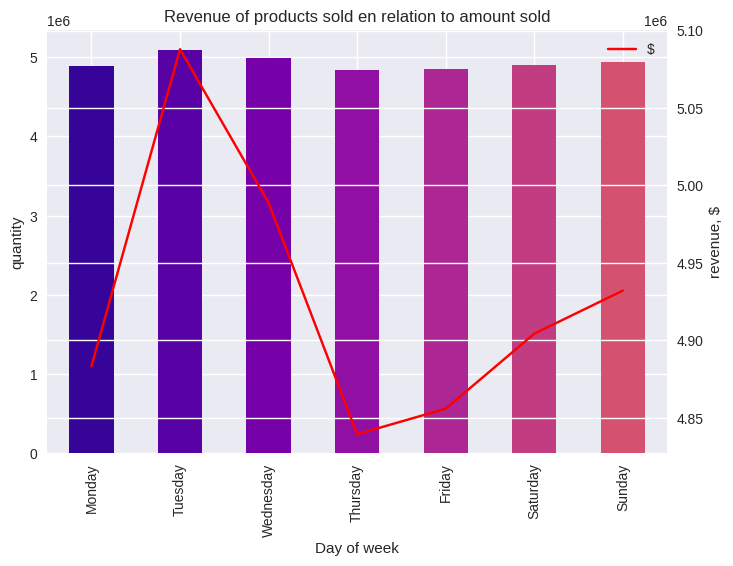

In [39]:
fig, ax = plt.subplots()
weekly_sales['revenue'].plot(kind='bar', x='day_of_week', y='quantity', ax=ax, color=palette)
ax1 = ax.twinx()
ax1.plot(weekly_sales.day_of_week, weekly_sales.revenue, color='r')

ax.set_ylabel('quantity')
ax1.set_ylabel('revenue, $')
ax.set_title('Revenue of products sold en relation to amount sold')
ax.set_xticks(range(len(weekly_sales.day_of_week)))
ax.set_xticklabels(weekly_sales.day_of_week, rotation=90)
ax.set_xlabel('Day of week')
plt.legend('$')
plt.show()

While the expectation was for sales to peak over the weekend due to increased free time, the data presents a different picture, with Tuesday emerging as the day of highest sales. This discrepancy suggests that factors beyond leisure time may influence purchasing behavior. It's plausible that promotions or discounts specifically offered on Tuesdays could be driving this trend. To gain further clarity, additional data on bonus systems, promotions, and discounts would be valuable for understanding the underlying reasons behind this sales pattern.

**Investigate the timing of sales throughout the day to determine the peak periods for purchases**

In [40]:
hour_sales = sales.groupby('time').agg({'revenue': 'sum', 'quantity': 'sum'}).reset_index()

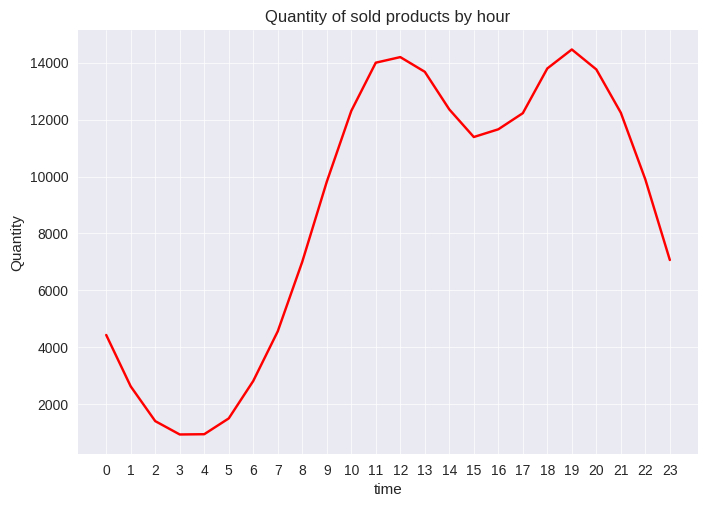

<Figure size 800x550 with 0 Axes>

In [41]:
fig, ax = plt.subplots()
ax.plot(hour_sales.time, hour_sales.quantity, color='r')
ax.set_ylabel('Quantity')
ax.set_title('Quantity of sold products by hour')
ax.set_xticks(range(len(hour_sales.time)))
ax.set_xticklabels(hour_sales.time)
ax.set_xlabel('time')
ax.grid(True, which='both', linewidth=0.5)
plt.show()
plt.savefig('hourly_sales.png')


Purchasing activity peaks at 12:00 PM and 7:00 PM. The lowest sales occur between 3:00 AM and 4:00 AM. This is understandable as people typically sleep during the night, and the peak of activity occurs in the evening after work, as well as during lunchtime.

Consider running limited-time promotions, discounts, or special deals during peak activity hours to attract more customers. However, it's essential to carefully assess whether the additional advertising expenses will bring in enough extra revenue to make it worthwhile.

# XYZ analysis

In [42]:
sales_xyz = sales.groupby(['month','Product']).agg({'quantity':sum})
sales_xyz = pd.pivot_table(sales_xyz, values='quantity', index='Product', columns='month', aggfunc='sum')
sales_xyz['coef'] = sales_xyz.std(axis=1)/sales_xyz.mean(axis=1)
sales_xyz['xyz'] = np.where(sales_xyz['coef'] < 0.25, 'X', np.where(sales_xyz['coef'] < 0.28, 'Y', 'Z'))
sales_xyz

month,January,February,March,April,May,June,July,August,September,October,November,December,coef,xyz
Product,,,,,,,,,,,,,,
20in Monitor,218,246,326,393,341,322,327,261,277,429,420,569,0.282578,Z
27in 4K Gaming Monitor,313,427,479,566,542,451,483,440,381,723,575,864,0.289844,Z
27in FHD Monitor,422,475,608,736,689,567,607,491,483,791,719,962,0.249921,X
34in Ultrawide Monitor,314,418,522,654,544,455,462,380,379,671,551,849,0.292012,Z
AA Batteries (4-pack),1424,1735,2216,2821,2384,2096,2071,1828,1771,2940,2625,3724,0.278098,Y
AAA Batteries (4-pack),1600,1972,2479,2939,2927,2162,2365,2021,1923,3363,3025,4241,0.288680,Z
Apple Airpods Headphones,818,1012,1322,1519,1365,1167,1220,1009,969,1671,1513,2076,0.270525,Y
Bose SoundSport Headphones,662,841,1198,1287,1176,983,1060,881,828,1465,1252,1824,0.284733,Z
Flatscreen TV,244,313,362,460,399,367,399,331,294,524,460,666,0.284653,Z


In [43]:
sales_xyz.xyz.value_counts()

Z    10
Y     7
X     2
Name: xyz, dtype: int64

This indicate that the major part of sales is Z group that means that this products with unpredictable demand. However, products from X group have connstant demand, while the demand for products Y is affected by seasonality, promotions or other external influences.

# Product analysis

In [44]:
product_sales = sales.groupby('Product').agg({'price_unit': 'first', 'quantity': 'sum', 'revenue': 'sum'}).reset_index()
product_sales

,Product,price_unit,quantity,revenue
0,20in Monitor,109.99,4129,454148.71
1,27in 4K Gaming Monitor,389.99,6244,2435097.56
2,27in FHD Monitor,149.99,7550,1132424.50
3,34in Ultrawide Monitor,379.99,6199,2355558.01
4,AA Batteries (4-pack),3.84,27635,106118.40
5,AAA Batteries (4-pack),2.99,31017,92740.83
6,Apple Airpods Headphones,150.00,15661,2349150.00
7,Bose SoundSport Headphones,99.99,13457,1345565.43
8,Flatscreen TV,300.00,4819,1445700.00
9,Google Phone,600.00,5532,3319200.00


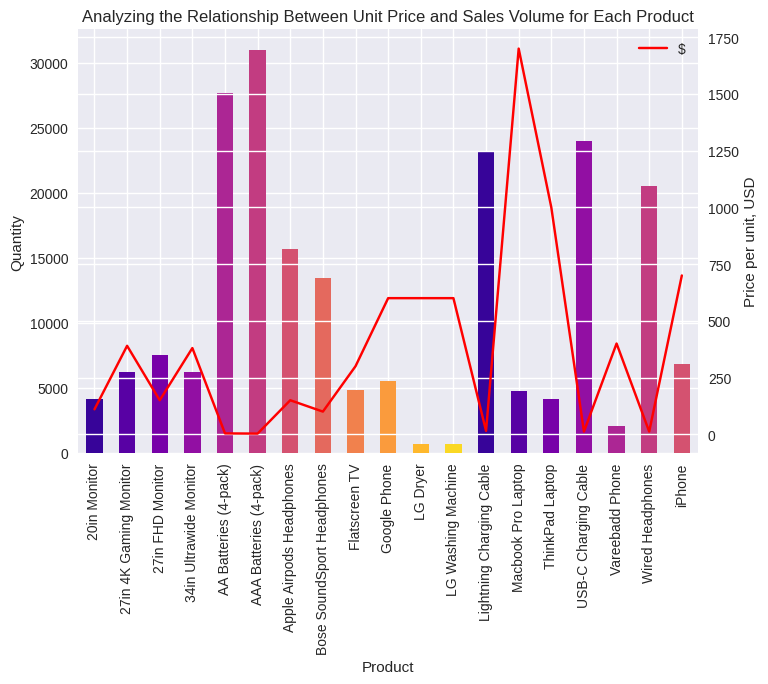

In [45]:
fig, ax = plt.subplots()
product_sales['quantity'].plot(kind='bar', x='Product', y='quantity', ax=ax, color=palette)
ax1 = ax.twinx()
ax1.plot(product_sales.Product, product_sales.price_unit, color='r')

ax1.set_ylabel('Price per unit, USD')
ax.set_ylabel('Quantity')
ax.set_title('Analyzing the Relationship Between Unit Price and Sales Volume for Each Product')
ax.set_xticks(range(len(product_sales.Product)))
ax.set_xticklabels(product_sales.Product, rotation=90)
ax.set_xlabel('Product')
plt.legend('$')
plt.show()

The products with the highest unit prices, such as the Macbook Pro Laptop and ThinkPad, are sold in smaller quantities, whereas the lowest-priced items like batteries, USB-C Cable, and Lightning Charging Cable have higher sales volumes. This trend is likely due to the household utility of these lower-priced products. Additionally, the demand for batteries, as well as potentially seasonal items like the iPhone, may require further analysis to understand their sales patterns fully.<br>
The washer and dryer experience lower sales due to their bulkiness and their classification as durable, long-lasting appliances.

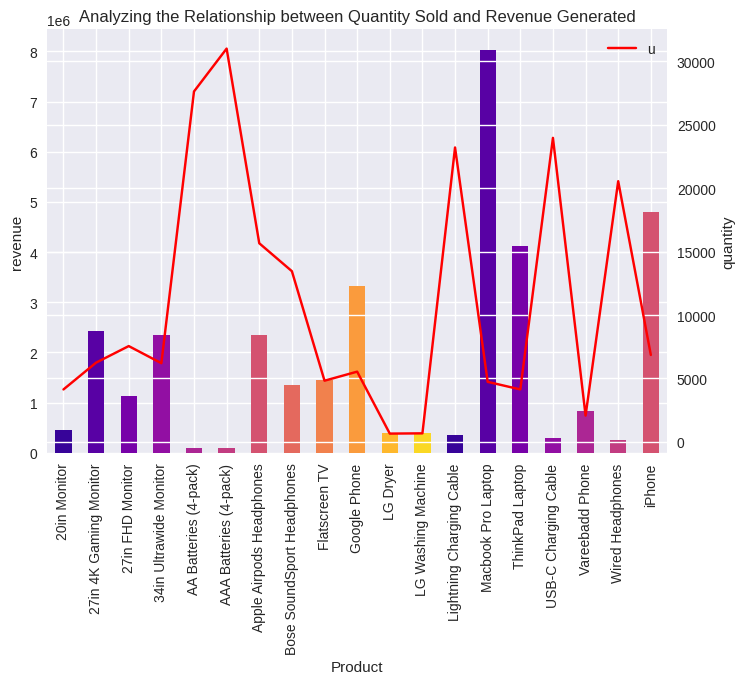

In [48]:
fig, ax = plt.subplots()
product_sales['revenue'].plot(kind='bar', x='Product', y='revenue', ax=ax, color=palette)
ax1 = ax.twinx()
ax1.plot(product_sales.Product, product_sales.quantity, color='r')

ax1.set_ylabel('quantity')
ax.set_ylabel('revenue')
ax.set_title('Analyzing the Relationship between Quantity Sold and Revenue Generated')
ax.set_xticks(range(len(product_sales.Product)))
ax.set_xticklabels(product_sales.Product, rotation=90)
ax.set_xlabel('Product')
plt.legend('un')
plt.show()

High sales volume does not guarantee high revenue for a product. Relatively inexpensive items per unit do not yield high revenue. MacBook Laptop, ThinkPad, and iPhone generate the highest revenue per sale, despite not having the highest sales volume, due to price per unit.

In [49]:
sales_xyz.columns

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', 'coef',
       'xyz'],
      dtype='object', name='month')

Let's conduct a separate analysis of Apple products to explore the hypothesis that the sales peaks are correlated with the release of new Apple products and their impact on sales trends.

In [50]:
selected_rows = sales_xyz.loc[['Macbook Pro Laptop', 'iPhone', 'Lightning Charging Cable']]

In [51]:
selected_rows = selected_rows.drop(columns=['coef', 'xyz'])

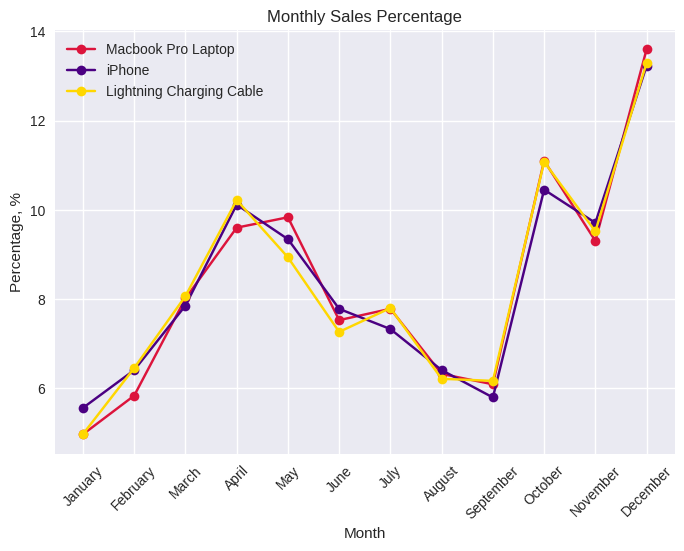

In [55]:
months = selected_rows.columns.tolist()
macbook_sales = selected_rows.loc['Macbook Pro Laptop']
iphone_sales = selected_rows.loc['iPhone']
cable_sales = selected_rows.loc['Lightning Charging Cable']

total_sales_macbook = macbook_sales.sum()
total_sales_iphone = iphone_sales.sum()
total_sales_cable = cable_sales.sum()

# Преобразовать значения в проценты от общего объема продаж
macbook_sales_percent = (macbook_sales / total_sales_macbook) * 100
iphone_sales_percent = (iphone_sales / total_sales_iphone) * 100
cable_sales_percent = (cable_sales / total_sales_cable) * 100

plt.plot(months, macbook_sales_percent, marker='o', label='Macbook Pro Laptop', color='crimson')
plt.plot(months, iphone_sales_percent, marker='o', label='iPhone', color='indigo')
plt.plot(months, cable_sales_percent, marker='o', label='Lightning Charging Cable', color='gold')

plt.title('Monthly Sales Percentage')
plt.xlabel('Month')
plt.ylabel('Percentage, %')

plt.xticks(rotation=45)
plt.legend()

plt.grid(True)
plt.show()



As observed, the hypothesis holds true. The peak sales of Apple products occur in April, October, and December, aligning with the unveiling of new product models. Conversely, sales dip notably in September, suggesting anticipation for product launches during this period.

ABC analysis offers a deeper dive into product sales for a comprehensive understanding.

# ABC analysis

ABC analysis is a method used to categorize items based on their importance and prioritize them accordingly. This helps in identifying which products require more attention in terms of management and control.

In [56]:
product_sales

,Product,price_unit,quantity,revenue
0,20in Monitor,109.99,4129,454148.71
1,27in 4K Gaming Monitor,389.99,6244,2435097.56
2,27in FHD Monitor,149.99,7550,1132424.50
3,34in Ultrawide Monitor,379.99,6199,2355558.01
4,AA Batteries (4-pack),3.84,27635,106118.40
5,AAA Batteries (4-pack),2.99,31017,92740.83
6,Apple Airpods Headphones,150.00,15661,2349150.00
7,Bose SoundSport Headphones,99.99,13457,1345565.43
8,Flatscreen TV,300.00,4819,1445700.00
9,Google Phone,600.00,5532,3319200.00


Formulating the contribution of each item to the overall revenue

In [57]:
product_sales['rel_revenue'] = product_sales.revenue/product_sales.revenue.sum()
product_sales['rel_quantity'] = product_sales.quantity/product_sales.quantity.sum()
product_sales

,Product,price_unit,quantity,revenue,rel_revenue,rel_quantity
0,20in Monitor,109.99,4129,454148.71,0.013167,0.019749
1,27in 4K Gaming Monitor,389.99,6244,2435097.56,0.070599,0.029864
2,27in FHD Monitor,149.99,7550,1132424.50,0.032831,0.036111
3,34in Ultrawide Monitor,379.99,6199,2355558.01,0.068293,0.029649
4,AA Batteries (4-pack),3.84,27635,106118.40,0.003077,0.132175
5,AAA Batteries (4-pack),2.99,31017,92740.83,0.002689,0.148351
6,Apple Airpods Headphones,150.00,15661,2349150.00,0.068107,0.074905
7,Bose SoundSport Headphones,99.99,13457,1345565.43,0.039011,0.064363
8,Flatscreen TV,300.00,4819,1445700.00,0.041914,0.023049
9,Google Phone,600.00,5532,3319200.00,0.096231,0.026459


Now we arrange and calculate the cumulative contribution.Divide into categories A (cumulative total up to 80%), B (cumulative total up to 95%), and C (cumulative total up to 100%).

In [58]:
product_sales = product_sales.sort_values('rel_revenue', ascending=False)
product_sales = product_sales.sort_values('rel_quantity', ascending=False)
product_sales['revenue_acum'] = product_sales.rel_revenue.cumsum()
product_sales['quantity_acum'] = product_sales.rel_quantity.cumsum()
product_sales['abc_revenue'] = np.where(product_sales['revenue_acum'] < 0.8, 'A', np.where(product_sales['revenue_acum'] < 0.95, 'B', 'C'))
product_sales['abc_quantity'] = np.where(product_sales['quantity_acum'] < 0.8, 'A', np.where(product_sales['quantity_acum'] < 0.95, 'B', 'C'))
product_sales

,Product,price_unit,quantity,revenue,rel_revenue,rel_quantity,revenue_acum,quantity_acum,abc_revenue,abc_quantity
5,AAA Batteries (4-pack),2.99,31017,92740.83,0.002689,0.148351,0.002689,0.148351,A,A
4,AA Batteries (4-pack),3.84,27635,106118.40,0.003077,0.132175,0.005765,0.280526,A,A
15,USB-C Charging Cable,11.95,23975,286501.25,0.008306,0.114670,0.014072,0.395195,A,A
12,Lightning Charging Cable,14.95,23217,347094.15,0.010063,0.111044,0.024135,0.506239,A,A
17,Wired Headphones,11.99,20557,246478.43,0.007146,0.098322,0.031281,0.604561,A,A
6,Apple Airpods Headphones,150.00,15661,2349150.00,0.068107,0.074905,0.099388,0.679466,A,A
7,Bose SoundSport Headphones,99.99,13457,1345565.43,0.039011,0.064363,0.138399,0.743829,A,A
2,27in FHD Monitor,149.99,7550,1132424.50,0.032831,0.036111,0.171230,0.779940,A,A
18,iPhone,700.00,6849,4794300.00,0.138997,0.032758,0.310227,0.812698,A,B
1,27in 4K Gaming Monitor,389.99,6244,2435097.56,0.070599,0.029864,0.380826,0.842562,A,B


In [59]:
abc_sales = product_sales[['Product', 'abc_revenue', 'abc_quantity']]
abc_sales['final_group'] = abc_sales['abc_revenue'] + abc_sales['abc_quantity']
abc_sales = abc_sales.groupby('final_group')['final_group'].agg({'count'}).reset_index()
abc_sales['perc'] = abc_sales['count'] / sum(abc_sales['count'])
abc_sales

<ipython-input-59-54157e8522f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,final_group,count,perc
0,AA,8,0.421053
1,AB,5,0.263158
2,BB,1,0.052632
3,BC,1,0.052632
4,CC,4,0.210526


Category **AA** comprises leading goods, which are of the highest priority and must be consistently stocked. These items require careful control of inventory levels to ensure availability.<br>
Category **AB** includes goods that offer the highest efficiency when promotional activities are conducted.<br>
Categories **BA, BB, BC, and CB** consist of average goods, necessitating moderate levels of inventory management and shelf placement.<br>
Category **CC** represents outsider goods, requiring detailed analysis to identify and eliminate the least effective items from the assortment.

In [60]:
abc_sales_1 = product_sales[['Product', 'abc_revenue', 'abc_quantity']]
#abc_sales_1['final_group'] = abc_sales_1['abc_revenue'] + abc_sales_1['abc_quantity']
abc_sales_1 = abc_sales_1.groupby('Product').agg({'abc_revenue':'first', 'abc_quantity':'first'}).reset_index()
abc_sales_1['final_group'] = abc_sales_1['abc_revenue'] + abc_sales_1['abc_quantity']

abc_sales_1

,Product,abc_revenue,abc_quantity,final_group
0,20in Monitor,C,C,CC
1,27in 4K Gaming Monitor,A,B,AB
2,27in FHD Monitor,A,A,AA
3,34in Ultrawide Monitor,A,B,AB
4,AA Batteries (4-pack),A,A,AA
5,AAA Batteries (4-pack),A,A,AA
6,Apple Airpods Headphones,A,A,AA
7,Bose SoundSport Headphones,A,A,AA
8,Flatscreen TV,A,B,AB
9,Google Phone,A,B,AB


In [62]:
abc_sales_2 = abc_sales_1[['Product', 'final_group']]
abc_sales_2['count'] = abc_sales_2.Product.count()
color_discrete_map = {
    'AA': 'indigo',
    'AB': 'deepskyblue',
    'AC': 'yellow',
    'BB': 'lightyellow',
    'BC': 'orange',
    'CC': 'red'
}

fig = px.treemap(abc_sales_2, path=['final_group', 'Product'], values='count',
                 color='final_group',
                 color_discrete_map=color_discrete_map)

fig.show()

<ipython-input-62-f232cf77b4fb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
sales_xyz = sales_xyz.reset_index()
sales_xyz

month,Product,January,February,March,April,May,June,July,August,September,October,November,December,coef,xyz
0,20in Monitor,218,246,326,393,341,322,327,261,277,429,420,569,0.282578,Z
1,27in 4K Gaming Monitor,313,427,479,566,542,451,483,440,381,723,575,864,0.289844,Z
2,27in FHD Monitor,422,475,608,736,689,567,607,491,483,791,719,962,0.249921,X
3,34in Ultrawide Monitor,314,418,522,654,544,455,462,380,379,671,551,849,0.292012,Z
4,AA Batteries (4-pack),1424,1735,2216,2821,2384,2096,2071,1828,1771,2940,2625,3724,0.278098,Y
5,AAA Batteries (4-pack),1600,1972,2479,2939,2927,2162,2365,2021,1923,3363,3025,4241,0.288680,Z
6,Apple Airpods Headphones,818,1012,1322,1519,1365,1167,1220,1009,969,1671,1513,2076,0.270525,Y
7,Bose SoundSport Headphones,662,841,1198,1287,1176,983,1060,881,828,1465,1252,1824,0.284733,Z
8,Flatscreen TV,244,313,362,460,399,367,399,331,294,524,460,666,0.284653,Z
9,Google Phone,319,381,463,580,480,391,411,361,341,597,493,715,0.259090,Y


In [64]:
merged_df = pd.merge(product_sales, sales_xyz[['xyz']], left_index=True, right_index=True, how='left')

In [65]:
merged_df

,Product,price_unit,quantity,revenue,rel_revenue,rel_quantity,revenue_acum,quantity_acum,abc_revenue,abc_quantity,xyz
5,AAA Batteries (4-pack),2.99,31017,92740.83,0.002689,0.148351,0.002689,0.148351,A,A,Z
4,AA Batteries (4-pack),3.84,27635,106118.40,0.003077,0.132175,0.005765,0.280526,A,A,Y
15,USB-C Charging Cable,11.95,23975,286501.25,0.008306,0.114670,0.014072,0.395195,A,A,Y
12,Lightning Charging Cable,14.95,23217,347094.15,0.010063,0.111044,0.024135,0.506239,A,A,Z
17,Wired Headphones,11.99,20557,246478.43,0.007146,0.098322,0.031281,0.604561,A,A,Z
6,Apple Airpods Headphones,150.00,15661,2349150.00,0.068107,0.074905,0.099388,0.679466,A,A,Y
7,Bose SoundSport Headphones,99.99,13457,1345565.43,0.039011,0.064363,0.138399,0.743829,A,A,Z
2,27in FHD Monitor,149.99,7550,1132424.50,0.032831,0.036111,0.171230,0.779940,A,A,X
18,iPhone,700.00,6849,4794300.00,0.138997,0.032758,0.310227,0.812698,A,B,Y
1,27in 4K Gaming Monitor,389.99,6244,2435097.56,0.070599,0.029864,0.380826,0.842562,A,B,Z


In [68]:
color_discrete_map = {
    'AX': 'indigo',
    'AY': 'deepskyblue',
    'AZ': 'yellow',
    'BX': 'lightyellow',
    'BY': 'peach',
    'BZ': 'orange',
    'CX': 'lightpink',
    'CY': 'red',
    'CZ': 'crimson'
}

In [69]:
abc_sales_rev = abc_sales_1.merge(merged_df[['Product', 'xyz']], on='Product', how='left')
abc_sales_rev = abc_sales_rev.groupby('Product').agg({'abc_revenue':'first', 'xyz':'first'}).reset_index()
abc_sales_rev['final_group'] = abc_sales_rev['abc_revenue'] + abc_sales_rev['xyz']

abc_rev_2 = abc_sales_rev[['Product', 'final_group']]
abc_rev_2['count'] = abc_rev_2.Product.count()

fig = px.treemap(abc_rev_2, path=['final_group', 'Product'], values='count',
                 color='final_group',
                 color_discrete_map = color_discrete_map)

fig.show()

<ipython-input-69-a7851f13dfe4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
abc_rev_2

,Product,final_group,count
0,20in Monitor,CZ,19
1,27in 4K Gaming Monitor,AZ,19
2,27in FHD Monitor,AX,19
3,34in Ultrawide Monitor,AZ,19
4,AA Batteries (4-pack),AY,19
5,AAA Batteries (4-pack),AZ,19
6,Apple Airpods Headphones,AY,19
7,Bose SoundSport Headphones,AZ,19
8,Flatscreen TV,AZ,19
9,Google Phone,AY,19


In [71]:
abc_sales_quan = abc_sales_1.merge(merged_df[['Product', 'xyz']], on='Product', how='left')
abc_sales_quan = abc_sales_quan.groupby('Product').agg({'abc_quantity':'first', 'xyz':'first'}).reset_index()
abc_sales_quan['final_group'] = abc_sales_quan['abc_quantity'] + abc_sales_quan['xyz']

abc_quan_2 = abc_sales_quan[['Product', 'final_group']]
abc_quan_2['count'] = abc_quan_2.Product.count()

fig = px.treemap(abc_quan_2, path=['final_group', 'Product'], values='count',
                 color='final_group',
                 color_discrete_map = color_discrete_map)

fig.show()

<ipython-input-71-2d4a1a35efd6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<li>AX: Products with a significant share of profit and consistent, stable demand.
<li>AY: Products with a significant share of profit but demand that fluctuates over time.
<li>AZ: Products with a significant share of profit but demand that is unpredictable.
<li>BX: Products with average profit volumes and stable, consistent demand.
<li>BY: Products with average profit volumes but demand that fluctuates over time.
<li>BZ: Products with medium profit volumes and demand that is unpredictable.
<li>CX: Products with insignificant profit margins but stable, consistent demand.
<li>CY: Products with insignificant profit margins and demand that fluctuates over time.
<li>CZ: Products with insignificant profit margins and unpredictable demand.

AX items are considered the most valuable, hence they should maintain constant availability to meet demand.
AY items have the potential to transition into the AX group. Their demand can be boosted, for instance, by featuring them prominently in catalogs.
CZ items necessitate further scrutiny. This category comprises goods with waning demand, suitable for supply upon request.
A are additionally promoted. These products can be mentioned in newsletters, pop-up windows on the website and push notifications. You can also fill a storefront on a marketplace with them and run promotions with them.
B stock up enough to cover demand.
C stop selling them. Another strategy is to reduce their inventory.
X always have to be in stock at all times. Most customers come for them.
Y are purchased in small quantities. Stocking them is usually pointless.
Z is better to supply on pre-order - they are bought on an ad hoc basis. It is not worth refusing them - often Z products familiarize consumers with the company's products.

Using ABC and XYZ analysis, products have been grouped according to their sales performance. The top-performing product, which generates the highest revenue, is the 27in FHD Monitor. At present, there are no specific recommendations for this item other than maintaining the current marketing strategy. Generally, products in category A do not require special promotions. Within the same category, there are products with varying demand levels and good contribution margins but relatively unstable demand: AA Batteries (4-pack), USB-C Charging Cable, Apple Airpods Headphones. The main strategy for these items is to increase sales, which necessitates enhancing their visibility to customers. The first two items are primarily accessories, and the most effective way to boost their sales is by offering them as add-ons with related products where appropriate. As for Airpods, featuring them prominently in catalogs could be an effective strategy.

The next category consists of items that sell reasonably well but experience sporadic demand, meaning their demand is highly unstable. These include Bose SoundSport Headphones, Wired Headphones, Flatscreen TV, Google Phone, and iPhone. For these items, a suitable strategy would be to fill the storefront on a marketplace with them and/or run promotions featuring them.

The following category comprises items with high revenue but low sales volume. These are typically high-priced items such as the Macbook Pro Laptop and ThinkPad Laptop. While they generate significant revenue, they lack in sales volume. To increase their sales, I would suggest offering discounts on related items with their purchase or providing a bonus for the next purchase of any item from the same brand or another item from the store.

The next category of products consists of items classified as group C, which may not yield significant profits but have relatively stable demand. These include the Vareebadd Phone, LG Washing Machine, and LG Dryer. Interestingly, despite being in the same category, the LG Washing Machine shows consistent and strong sales according to XYZ analysis, while the other two items have unstable sales patterns.

Let's focus on the LG products. Since the washing machine sells steadily but the dryer does not, one strategy could be to offer a discount on the dryer when purchasing the washing machine. Alternatively, offering free delivery and installation, along with an extended warranty, when both items are purchased together could also be effective. The best strategy would need to be determined through further analysis, but if there are no improvements in sales after implementing these changes and conducting additional analysis, discontinuing the sale of these two items might be advisable.

As for the Vareebadd Phone, it falls into category CC but within category Y, indicating potential for a loyalty program. Again, offering a bonus or discount for future purchases could be effective in encouraging customer loyalty and repeat purchases.

Based on all analyses, there is one product that stands out as a complete outsider: the 20in Monitor. It's advisable to either discontinue its sale altogether or transition to a pre-order model where it's only available upon customer request. This approach ensures that resources are not allocated towards stocking a product with minimal demand while still catering to potential customers who specifically seek out this item.


Another strategy, specifically for Apple products, involves leveraging sales peaks coinciding with product launches. It would make sense to offer discounts on Apple products prior to new releases, such as in the summer or January. This strategy would incentivize customers to make purchases, even with discounted prices, which would prevent the products from falling into a lower revenue category while potentially increasing sales volume. Additionally, it would help clear out older models, aligning with Apple's strategy of refreshing their product lineup annually.

All strategies should be examined with additional data and their performance should be studied to see if they are applicable. It's always necessary to evaluate what we implement to understand if it works and if it benefits us.